In [ ]:

import cv2
from google.colab.patches import cv2_imshow # Import the Colab patch
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os
import random, string


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread('/content/Screenshot 2024-07-31 055713.png')

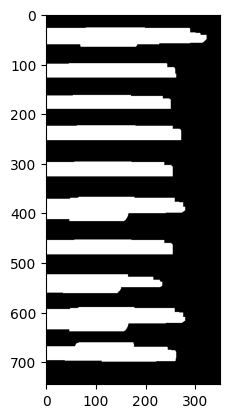

In [ ]:
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h,w,c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    img = cv2.resize(img,(new_w,new_h),interpolation = cv2.INTER_AREA)
plt.imshow(img)

def threasholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh,cmap="gray")
    return thresh

thresh_img = threasholding(img)

# Increased kernel size for better word grouping
# kernel = np.ones((10,80),np.uint16)
kernel = np.ones((8,110),np.uint16)

dilated = cv2.dilate(thresh_img,kernel,iterations = 1)
plt.imshow(dilated,cmap='gray')

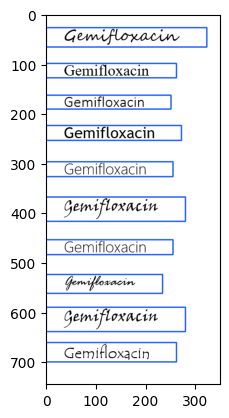

In [ ]:
(contours,heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contours_lines =sorted(contours,key=lambda ctr:cv2.boundingRect(ctr)[1])

img2 = img.copy()
world_count=[]
for  ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    if w > 10 and h > 10:
        world_count.append([x,y,x+w,y+h])
        cv2.rectangle(img2,(x,y),(x+w ,y+h),(40,100,250),2)

plt.imshow(img2)

In [ ]:
output_dir = "word_53"
os.makedirs(output_dir, exist_ok=True)



for i, (x, y, x_end, y_end) in enumerate(world_count):
    word_image = img[y:y_end, x:x_end]
    random_name = ''.join(random.choices(string.ascii_lowercase + string.digits, k=10))
    output_path = os.path.join(output_dir, f"{random_name}.jpg")
    cv2.imwrite(output_path, word_image)


In [ ]:
# prompt: download on pc 'word_images'\

!zip -r word_53.zip word_53
from google.colab import files
files.download('word_53.zip')


  adding: word_53/ (stored 0%)
  adding: word_53/5dico9pli5.jpg (deflated 7%)
  adding: word_53/e272tib0qk.jpg (deflated 5%)
  adding: word_53/2801khwbov.jpg (deflated 5%)
  adding: word_53/kfltikr0p2.jpg (deflated 7%)
  adding: word_53/1uuc34d66m.jpg (deflated 5%)
  adding: word_53/245lx1k4lp.jpg (deflated 6%)
  adding: word_53/jmwk1x2rki.jpg (deflated 5%)
  adding: word_53/5zejhozjvb.jpg (deflated 6%)
  adding: word_53/6ddluo8mnj.jpg (deflated 7%)
  adding: word_53/qc3i1cbbom.jpg (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>